In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv2

In [2]:
path="/Users/yashsawant/Desktop/SM PROJECT/NT SCAN"
path1="/Users/yashsawant/Desktop/SM PROJECT/ANAMOLY- 20 weeks"
path2= "/Users/yashsawant/Desktop/SM PROJECT/GROWTH SCAN"
ntscan = os.listdir(path)
anamoly = os.listdir(path1)
growth = os.listdir(path2)

In [3]:
ntscan_images = [ ]
for img in ntscan:
    img = cv2.imread(path+'/'+img,0)
    ntscan_images.append(img)


In [4]:
anamoly_images = [ ]
for img in anamoly:
    img = cv2.imread(path1+'/'+img,0)
    anamoly_images.append(img)

In [5]:
growth_images = [ ]
for img in growth:
    img = cv2.imread(path2+'/'+img,0)
    growth_images.append(img)

In [6]:
ntscan_images= np.array(ntscan_images)
anamoly_images= np.array(anamoly_images)
growth_images= np.array(growth_images)

In [7]:
growth_images.shape


(41,)

In [8]:
##had to delete bad image
ntscan_images= np.delete(ntscan_images,5)
anamoly_images= np.delete(anamoly_images,5)
growth_images= np.delete(growth_images,3)

In [9]:
first = []
for i in range(0,40):
  tem= cv2.resize(ntscan_images[i],(128,128))
  first.append(tem)

second= []
for i in range(0,40):
  tem= cv2.resize(anamoly_images[i],(128,128))
  second.append(tem)
    
third= []
for i in range(0,40):
  tem= cv2.resize(growth_images[i],(128,128))
  third.append(tem)

In [10]:
first=np.array(first)
second=np.array(second)
third=np.array(third)


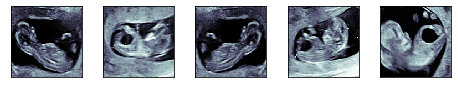

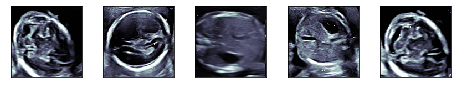

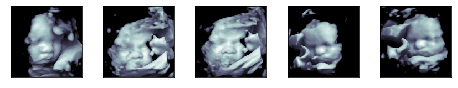

In [11]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
for i in range(5):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(first[i].reshape((128,128)),cmap=plt.cm.bone)
fig = plt.figure(figsize=(8, 6))
for i in range(5):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(second[i].reshape((128,128)),cmap=plt.cm.bone)
fig = plt.figure(figsize=(8, 6))
for i in range(5):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(third[i].reshape((128,128)),cmap=plt.cm.bone)


In [12]:
first.shape

(40, 128, 128)

In [13]:
X = np.append(first,second,axis = 0)

In [14]:
X = np.append(X,third,axis= 0)

In [15]:
X.shape

(120, 128, 128)

In [16]:
Y = pd.read_csv("/Users/yashsawant/Desktop/SM PROJECT/Y.csv")

In [17]:
Y = np.array(Y)

In [18]:
Y = np.insert(Y,0,1,axis=0)

In [19]:
Y.shape

(120, 1)

In [20]:
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.2
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=TEST_SIZE)

In [21]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(96, 128, 128)
(96, 1)
(24, 128, 128)
(24, 1)


In [22]:
from keras.utils import to_categorical
ytrain=to_categorical(ytrain)
ytest= to_categorical(ytest)

In [23]:
ytest= ytest[:,1:]
ytrain= ytrain[:,1:]

In [24]:
ytrain.shape

(96, 3)

In [25]:
import keras
from keras import models
from keras import layers


In [26]:
nn=models.Sequential()

In [27]:
nn.add(layers.Dense(512, activation="relu", input_shape=(128*128,)))
nn.add(layers.Dense(256,activation='relu'))
nn.add(layers.Dense(128,activation='relu'))
nn.add(layers.Dense(64,activation='relu'))
nn.add(layers.Dense(3,activation='softmax'))

In [28]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               8389120   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 8,561,795
Trainable params: 8,561,795
Non-trainable params: 0
_________________________________________________________________


In [29]:
xtest.shape

(24, 128, 128)

In [30]:
xtrain = xtrain.reshape((96,128*128))
xtest = xtest.reshape((24,128*128))

In [31]:
nn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
nn.fit(xtrain, ytrain, epochs=100, batch_size=128) 

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 63.1517 - accuracy: 0.3750
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 10161.3037 - accuracy: 0.3333
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 9241.2725 - accuracy: 0.3333
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 965.5886 - accuracy: 0.3333
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 2357.6167 - accuracy: 0.3333
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 1843.3981 - accuracy: 0.3333
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 1573.6725 - accuracy: 0.3333
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 827.6404 - accuracy: 0.3333
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 991.5420 - accuracy: 0.3333
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 948.5327 - accuracy: 0.3333
Epoc

In [33]:
test_loss, test_acc=nn.evaluate(xtest, ytest)
print(test_loss, test_acc)

1/1 [==============================] - 0s 940us/step - loss: 4.7334 - accuracy: 0.9583
4.733412265777588 0.9583333134651184


PCA

In [34]:
xtrain=xtrain.astype('float')/255
xtest = xtest.astype('float')/255

In [35]:
from sklearn.decomposition import PCA
pca1 = PCA(65) 
pca1.fit(xtrain)

PCA(copy=True, iterated_power='auto', n_components=65, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
print(pca1.components_.shape) ##V

(65, 16384)


In [37]:
print(pca1.explained_variance_)

[158.37285075  89.34820663  60.07878505  54.91010402  38.53288224
  30.50769672  28.38182906  27.39317126  21.50302033  19.07560268
  18.00684627  16.59631421  15.2464966   14.45863511  13.64662386
  13.00620737  12.709983    12.00022593  11.54523937  10.9452833
  10.84292151  10.03808897   9.23854797   8.99829624   8.73935689
   8.63590548   8.22228509   8.04609109   7.62707312   7.3956148
   7.31355154   7.06342811   6.77921184   6.63571255   6.47848406
   6.13122882   6.05630788   5.81735311   5.72855802   5.61974963
   5.46529229   5.29865456   5.14288732   5.08608448   4.95030413
   4.86322715   4.78386992   4.63460648   4.42436205   4.32406591
   4.26291504   4.1807942    4.02130621   3.95828008   3.8535178
   3.74607916   3.62989077   3.61826817   3.46588326   3.41224567
   3.37612263   3.33419444   3.18739467   3.1123844    2.9275482 ]


In [38]:
np.cumsum(pca1.explained_variance_ratio_)

array([0.16328765, 0.25540861, 0.31735183, 0.37396596, 0.41369464,
       0.44514908, 0.47441169, 0.50265496, 0.52482528, 0.54449286,
       0.56305851, 0.58016986, 0.59588951, 0.61079684, 0.62486696,
       0.63827679, 0.6513812 , 0.66375383, 0.67565736, 0.68694231,
       0.69812172, 0.70847132, 0.71799657, 0.72727411, 0.73628468,
       0.74518858, 0.75366603, 0.76196182, 0.76982558, 0.7774507 ,
       0.78499122, 0.79227385, 0.79926344, 0.80610508, 0.81278461,
       0.81910611, 0.82535036, 0.83134825, 0.83725458, 0.84304873,
       0.84868362, 0.85414671, 0.8594492 , 0.86469312, 0.86979705,
       0.8748112 , 0.87974352, 0.88452196, 0.88908362, 0.89354188,
       0.89793708, 0.90224762, 0.90639372, 0.91047484, 0.91444794,
       0.91831027, 0.92205281, 0.92578337, 0.92935681, 0.93287494,
       0.93635584, 0.9397935 , 0.94307981, 0.94628878, 0.94930718])

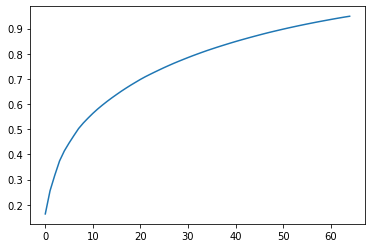

In [39]:
import numpy as np
plt.plot(np.cumsum(pca1.explained_variance_ratio_))

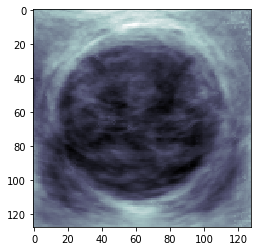

In [40]:
plt.imshow(pca1.components_[1].reshape(128,128),cmap=plt.cm.bone)

In [41]:
xtrain_pca = pca1.fit_transform(xtrain)  ##omega
 
print(xtrain_pca.shape) 

(96, 65)


In [42]:
xtest_pca = pca1.transform(xtest)
print(xtest_pca.shape)

(24, 65)


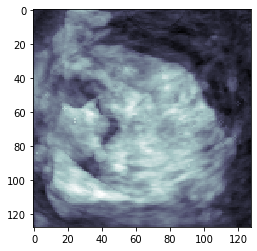

In [43]:
inv_proj3 = pca1.inverse_transform(xtrain_pca)
plt.imshow(inv_proj3[50].reshape(128,128),cmap=plt.cm.bone)

In [44]:
np=models.Sequential()
np.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
np.add(layers.Dense(512, activation="relu", input_shape=(65,)))
np.add(layers.Dense(256,activation='relu'))
np.add(layers.Dense(128,activation='relu'))
np.add(layers.Dense(64,activation='relu'))
np.add(layers.Dense(3,activation='softmax'))

In [46]:
np.fit(xtrain_pca, ytrain, epochs= 100, batch_size= 10 )

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 0.7362 - accuracy: 0.6771
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9896
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 7.5762e-04 - accuracy: 1.0000
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 3.8855e-04 - accuracy: 1.0000
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 2.0785e-04 - accuracy: 1.0000
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 1.1351e-04 - accuracy: 1.0000
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 6.0379e-05 - accura

In [47]:
test_loss, test_acc=np.evaluate(xtest_pca, ytest)
print(test_loss, test_acc)

1/1 [==============================] - 0s 979us/step - loss: 0.6175 - accuracy: 0.9167
0.6174803376197815 0.9166666865348816
